In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import pysrt
import os
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

In [2]:
import nltk
nltk.download('stopwords',quiet=True) 
nltk.download('wordnet', quiet=True) # wordnet library
nltk.download('words', quiet=True) # words library
nltk.download('punkt', quiet=True) # tokenize library

True

In [3]:
from lib.functionLib import clean_text,counter_wrd,remove_stop

In [4]:
stop = stopwords.words('english')

In [5]:
dialoges = []
for idx,subtitle_file in enumerate(sorted(os.listdir('./dataset/')),1):
    print(f'Extracting[file_no: {idx}]: {subtitle_file}')
    _subs = pysrt.open(os.path.abspath(f'./dataset/{subtitle_file}'))
    _subs = [subtitle.text for subtitle in _subs]
    dialoges.extend(_subs)

Extracting[file_no: 1]: The.Big.Bang.Theory.S01E01.Pilot.1080p.BluRay.x264-CiNEFiLE.English.srt
Extracting[file_no: 2]: The.Big.Bang.Theory.S01E02.The.Big.Bran.Hypothesis.1080p.BluRay.x264-CiNEFiLE.English.srt
Extracting[file_no: 3]: The.Big.Bang.Theory.S01E03.The.Fuzzy.Boots.Corollary.1080p.BluRay.x264-CiNEFiLE.English.srt
Extracting[file_no: 4]: The.Big.Bang.Theory.S01E04.The.Luminous Fish.Effect.1080p.BluRay.x264-CiNEFiLE.English.srt
Extracting[file_no: 5]: The.Big.Bang.Theory.S01E05.The.Hamburger.Postulate.1080p.BluRay.x264-CiNEFiLE.English.srt
Extracting[file_no: 6]: The.Big.Bang.Theory.S01E06.The.Middle-Earth Paradigm.1080p.BluRay.x264-CiNEFiLE.English.srt
Extracting[file_no: 7]: The.Big.Bang.Theory.S01E07.The.Dumpling.Paradox.1080p.BluRay.x264-CiNEFiLE.English.srt
Extracting[file_no: 8]: The.Big.Bang.Theory.S01E08.The.Grasshopper.Experiment.1080p.BluRay.x264-CiNEFiLE.English.srt
Extracting[file_no: 9]: The.Big.Bang.Theory.S01E09.The.Cooper-Hofstadter.Polarization.1080p.BluRay.x2

In [6]:
print(f'Total Dialoges : {len(dialoges)}')

Total Dialoges : 5919


In [7]:
if not os.path.isfile('./temporary_files/subtitiles_dataframe.csv'):
    df = pd.DataFrame({"dialog":dialoges})
    df = clean_text(df=df,column='dialog')
    df['cleaned_dialog'] = df["dialog"].apply(lambda x:x.replace("font",''))
    df['cleaned_dialog'] = df["cleaned_dialog"].apply(lambda x:x.replace("color",''))
    df["cleaned_dialog"] = df["cleaned_dialog"].apply(lambda x: remove_stop(x))
    df.to_parquet("./temporary_files/subtitiles_dataframe.parquet")
    df.to_csv("./temporary_files/subtitiles_dataframe.csv")
else:
    df = pd.read_csv('./temporary_files/subtitiles_dataframe.csv')

In [8]:
df.head()

,dialog,cleaned_dialog
0,font color sheldon font if a photon is directe...,sheldon photon directed plane two slits either...
1,it will not go through both if unobserved it will,go unobserved
2,if it s observed after it left the plane befor...,observed left plane hits target
3,it will not have gone through both slits agreed,gone slits agreed
4,font color leonand font what s your point,leonand point


In [9]:
counter_subtitles = counter_wrd(df['cleaned_dialog'])
counter_subtitles.most_common(5)

[('oh', 292), ('okay', 237), ('sheldon', 231), ('e', 231), ('ce', 226)]

In [10]:
word_string=" ".join(df['cleaned_dialog'].str.lower())

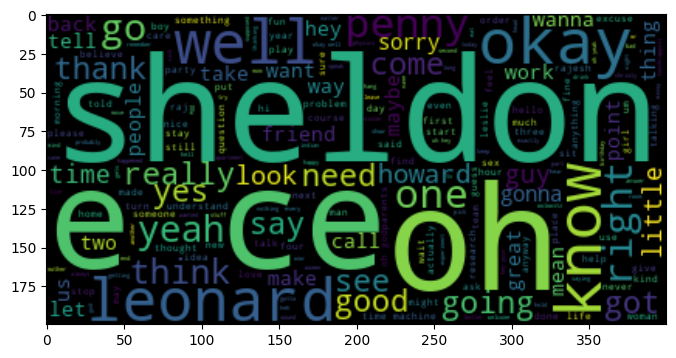

In [16]:
wordcloud = WordCloud(stopwords = STOPWORDS).generate(word_string)
plt.figure(figsize=[8,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()